In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


Matplotlib is building the font cache; this may take a moment.


In [5]:
def genera_datos_lineales(
        n:int=100,
        slope:float=0.5,
        intercept:float=1,
        noise_scale:float=1.5
    ) -> pd.DataFrame:
    X = np.linspace(0, 10, n)
    y = slope * X + intercept + np.random.normal(scale=noise_scale, size=n)
    df = pd.DataFrame({"x": X, "y": y})
    return df

In [12]:
def descenso_gradiente_historial(datos: pd.DataFrame, learning_rate: float, iteraciones: int) -> tuple[float, float, list, list, list]:
    """
    Realiza el descenso de gradiente para una regresión lineal y guarda el historial
    de los parámetros (m, b) y del Error Cuadrático Medio (MSE) en cada iteración.
    """
    # Extraer las columnas x e y del DataFrame
    x = datos["x"]
    y = datos["y"]
    # 1. Inicializar parámetros y listas de historial
    m = 0.0
    b = 0.0
    n = float(len(datos))

    historial_m = []
    historial_b = []
    historial_error = []

    # 2. Iterar para optimizar m y b
    for i in range(iteraciones):
        # Almacenar los valores de la iteración actual ANTES de actualizarlos
        historial_m.append(m)
        historial_b.append(b)

        # Calcular las predicciones actuales
        y_pred = m * x + b

        # Calcular y almacenar el Error Cuadrático Medio (MSE)
        error = (1/n) * sum((y - y_pred) ** 2)
        historial_error.append(error)

        # Calcular los gradientes
        D_m = (-2/n) * sum(x * (y - y_pred))
        D_b = (-2/n) * sum(y - y_pred)

        # 3. Actualizar los parámetros
        m = m - learning_rate * D_m
        b = b - learning_rate * D_b

    return m, b, historial_m, historial_b, historial_error


In [13]:
# Hiperparámetros
learning_rate = 0.001
iteraciones = 10000

# Ejecutar el descenso de gradiente
datos = genera_datos_lineales(n=1000, slope=2, intercept=5, noise_scale=5)
m_final, b_final, h_m, h_b, h_error = descenso_gradiente_historial(datos, learning_rate, iteraciones)

Text(0, 0.5, 'Error Cuadrático Medio (MSE)')

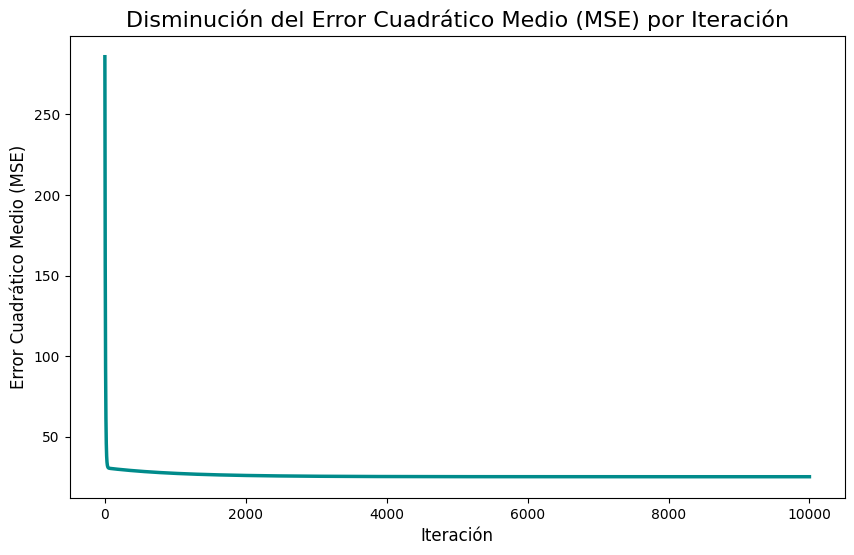

In [14]:
plot_data = pd.DataFrame({
    'Iteración': range(iteraciones),
    'MSE': h_error
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='Iteración', y='MSE', color='darkcyan', linewidth=2.5)

# 4. Añadir títulos y etiquetas
plt.title('Disminución del Error Cuadrático Medio (MSE) por Iteración', fontsize=16)
plt.xlabel('Iteración', fontsize=12)
plt.ylabel('Error Cuadrático Medio (MSE)', fontsize=12)


In [15]:
# 1. Preparar los datos
# Scikit-learn espera que X sea un array 2D
X_sklearn = datos[['x']]
y_sklearn = datos['y']

# 2. Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_sklearn, y_sklearn)

# Obtener los coeficientes
m_sklearn = modelo.coef_[0]
b_sklearn = modelo.intercept_

In [16]:
print("--- Implementación Manual ---")
print(f"La pendiente (m) encontrada es: {m_final:.4f}")
print(f"El intercepto (b) encontrado es: {b_final:.4f}")
print("\n--- Resultado con Scikit-Learn ---")
print(f"La pendiente (m) encontrada es: {m_sklearn:.4f}")
print(f"El intercepto (b) encontrado es: {b_sklearn:.4f}")

--- Implementación Manual ---
La pendiente (m) encontrada es: 1.9983
El intercepto (b) encontrado es: 5.0788

--- Resultado con Scikit-Learn ---
La pendiente (m) encontrada es: 1.9930
El intercepto (b) encontrado es: 5.1139


## Implementación multivariada

In [ ]:
def generar_datos_lineales_multivariados(n_muestras: int, n_caracteristicas: int, ruido: float = 0.5) -> tuple[pd.DataFrame, np.ndarray, float]:
    """
    Genera un conjunto de datos sintético para regresión lineal multivariada.

    Args:
        n_muestras (int): El número de puntos de datos a generar (filas).
        n_caracteristicas (int): El número de variables independientes (características).
        ruido (float): La desviación estándar del ruido gaussiano a añadir.
                       Controla la dispersión de los puntos.

    Returns:
        tuple[pd.DataFrame, np.ndarray, float]:
            - Un DataFrame de pandas con las características (x1, x2, ...) y la variable objetivo (y).
            - El array de coeficientes (pesos) reales que se usaron para generar los datos.
            - El intercepto (sesgo) real que se usó.
    """
    # 1. Generar las características (X) con valores aleatorios entre 0 y 10
    X = 10 * np.random.rand(n_muestras, n_caracteristicas)

    # 2. Generar coeficientes e intercepto reales aleatorios
    # Estos son los "verdaderos" parámetros que un modelo intentaría encontrar.
    coeficientes_reales = np.random.randn(n_caracteristicas) * 2
    intercepto_real = np.random.randn() * 5

    # 3. Generar el ruido gaussiano
    # El ruido simula la variabilidad aleatoria en los datos del mundo real.
    ruido_gaussiano = np.random.randn(n_muestras) * ruido

    # 4. Calcular la variable objetivo (y) usando la ecuación lineal
    # y = (X • coeficientes) + intercepto + ruido
    y = np.dot(X, coeficientes_reales) + intercepto_real + ruido_gaussiano

    # 5. Formatear la salida en un DataFrame de pandas
    nombres_columnas = [f'x{i+1}' for i in range(n_caracteristicas)]
    datos = pd.DataFrame(X, columns=nombres_columnas)
    datos['y'] = y

    return datos, coeficientes_reales, intercepto_real

In [ ]:
num_muestras = 200
num_caracteristicas = 10 
nivel_ruido = 1.5

# Generar los datos
datos_generados, coeficientes, intercepto = generar_datos_lineales_multivariados(
    n_muestras=num_muestras,
    n_caracteristicas=num_caracteristicas,
    ruido=nivel_ruido
)

In [ ]:
def descenso_gradiente_multivariado(datos: pd.DataFrame, learning_rate: float, iteraciones: int) -> tuple[np.ndarray, float, list]:
    """
    Realiza el descenso de gradiente para una regresión lineal multivariada.

    Args:
        datos (pd.DataFrame): DataFrame que contiene las características y la variable objetivo 'y'.
        learning_rate (float): La tasa de aprendizaje.
        iteraciones (int): El número de iteraciones para ejecutar el algoritmo.

    Returns:
        tuple[np.ndarray, float, list]:
            - El array de coeficientes (pesos) optimizados.
            - El intercepto (sesgo) optimizado.
            - Una lista con el historial del Error Cuadrático Medio (MSE) en cada iteración.
    """
    # 1. Preparar los datos
    X = ...  # Matriz de características
    y = datos['y'].values              # Vector de la variable objetivo
    n_muestras, n_caracteristicas = ...

    # 2. Inicializar parámetros
    coeficientes = np.zeros(n_caracteristicas)
    intercepto = 0.0
    historial_error = []

    # 3. Iterar para optimizar los parámetros
    for i in range(iteraciones):
        # Calcular las predicciones (producto punto de X y coeficientes)
        # Ecuación: y_pred = (X • coeficientes) + intercepto
        y_pred = ...

        # Calcular el Error Cuadrático Medio (MSE) y guardarlo
        error = ...
        historial_error.append(error)

        # Calcular los gradientes (derivadas parciales)
        # El gradiente es la dirección de máximo ascenso del error.
        # Lo calculamos de forma vectorizada para eficiencia.
        D_coeficientes = ...
        D_intercepto = ...

        # 4. Actualizar los parámetros (moverse en dirección opuesta al gradiente)
        coeficientes = ...
        intercepto = ...

    return coeficientes, intercepto, historial_error

In [ ]:
num_muestras = 200
num_caracteristicas = 3
nivel_ruido = 1.5
datos_generados, coef_reales, int_real = generar_datos_lineales_multivariados(
    n_muestras=num_muestras,
    n_caracteristicas=num_caracteristicas,
    ruido=nivel_ruido
)

X_original = datos_generados.drop('y', axis=1)
y = datos_generados['y']

scaler = StandardScaler()
X_escalado = scaler.fit_transform(X_original)

datos_escalados = pd.DataFrame(X_escalado, columns=X_original.columns)
datos_escalados['y'] = y.values

learning_rate = 0.01
iteraciones = 1000
coef_aprendidos, int_aprendido, error_hist = descenso_gradiente_multivariado(
    datos=datos_escalados,
    learning_rate=learning_rate,
    iteraciones=iteraciones
)

modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_escalado, y)
coef_sklearn = modelo_sklearn.coef_
int_sklearn = modelo_sklearn.intercept_

In [ ]:
print("--- Comparación de Parámetros (con datos escalados) ---")
print(f"Intercepto GD: {int_aprendido:.4f}  |  Intercepto Sklearn: {int_sklearn:.4f}")
for i in range(num_caracteristicas):
    print(f"Coef. x{i+1} GD: {coef_aprendidos[i]:.4f} |  Coef. x{i+1} Sklearn: {coef_sklearn[i]:.4f}")